In [1]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

import pandas as pd
df_test = pd.read_csv('/Users/mk0730/Documents/bogazici/swe582/ml.titanic/test.csv', header=0)
df_train = pd.read_csv('/Users/mk0730/Documents/bogazici/swe582/ml.titanic/train.csv', header=0)


X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

print("Columns: ", df_train.columns.values)

('Columns: ', array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))


### PassangerID is dropped since it is unrelevent, also we dropped survived column from train data. 
### In the below cell, we present the first five row of the data.


In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Train data set length: ", len(df_train))
print("Test data set length: ", len(df_test))

('Train data set length: ', 891)
('Test data set length: ', 418)


In [4]:
print("Age, Fare details: \n-----------------------------")
print(df_train[["Age","Fare"]].describe())
print()

print("Sex, Embarked details: \n-----------------------------")
print(df_train[["Sex", "Embarked"]].describe())
print()

Age, Fare details: 
-----------------------------
              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200
()
Sex, Embarked details: 
-----------------------------
         Sex Embarked
count    891      889
unique     2        3
top     male        S
freq     577      644
()


In [5]:
# Fill empty and NaNs values with NaN
combine = [df_train, df_test]
df_train = df_train.fillna(np.nan)

# Check for Null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
pClassSurv = df_train[['Pclass', 'Survived']].groupby(["Pclass"], as_index=False).mean()
print(pClassSurv)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


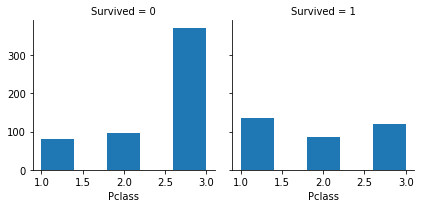

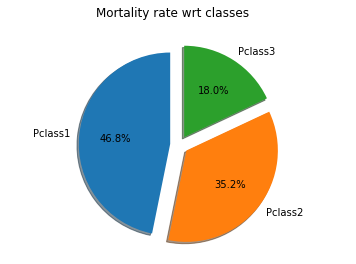

In [7]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Pclass', bins=5)

#print(pClassSurv["Survived"])

labels = 'Pclass1', 'Pclass2', 'Pclass3'
sizes = [pClassSurv["Survived"][0], pClassSurv["Survived"][1], pClassSurv["Survived"][2]]

explode = (0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt classes")

plt.show()

## First plot shows number of survived and lost people in "passenger class".
* 3.0 represents economy class
* 2.0 represents middle class
* 1.0 represents business class 

## Pie chart shows mortality rate with respect to passenger classes.

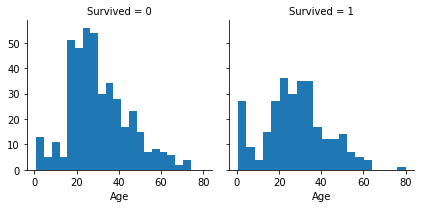

In [8]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

   Embarked  Survived
0         0  0.339009
1         1  0.553571
2         2  0.389610


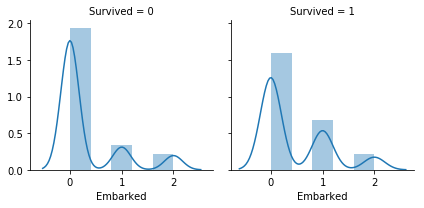

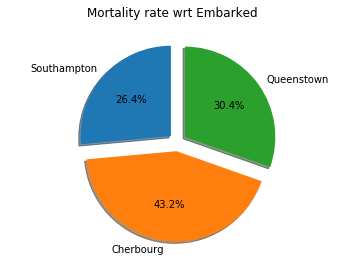

In [9]:
combine = [df_train, df_test]
freq_port = df_train.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

if combine[0]["Embarked"][0] != 0:
    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    

g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Embarked', bins=5)

labels = 'Southampton', 'Cherbourg', 'Queenstown'

embarked = df_train[['Embarked', 'Survived']].groupby(["Embarked"], as_index=False).mean()
print(embarked)


sizes = [embarked["Survived"][0], embarked["Survived"][1], embarked["Survived"][2]]

explode = (0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Embarked")

plt.show()


## First plot shows number of survived and lost people in "passenger class".
* 3.0 represents economy class
* 2.0 represents middle class
* 1.0 represents business class 

## Pie chart shows mortality rate with respect to passenger classes.

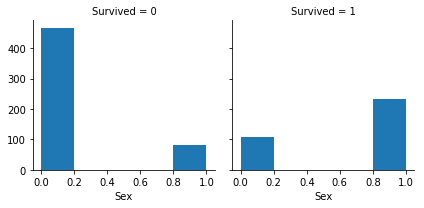

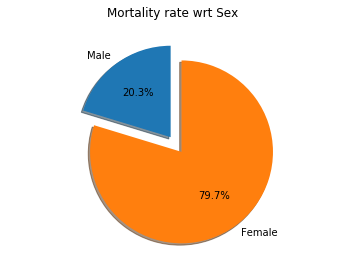

In [10]:
if combine[0]["Sex"][0] != 0:
    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        

g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Sex', bins=5)

labels = 'Male', 'Female'

sex = df_train[['Sex', 'Survived']].groupby(["Sex"], as_index=False).mean()
#print(embarked)


total = sex["Survived"][0] + sex["Survived"][1]
sizes = [sex["Survived"][0]/total, sex["Survived"][1]/total]

explode = (0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Sex")

plt.show()

## Plot diagram gives the numbers of survived female and male passengers. 
## Much more female passengers are survived when we compare it with male. 

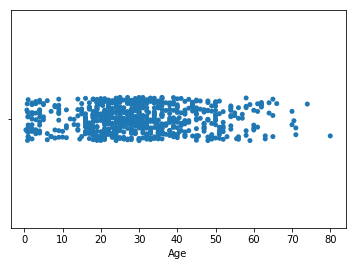

In [11]:
g = sns.stripplot(x="Age", data=df_train, jitter=True)

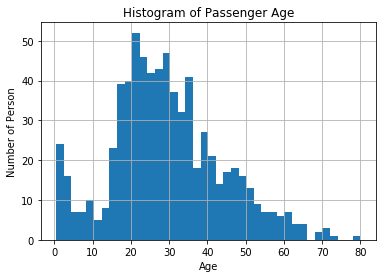

In [12]:
df_train.Age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

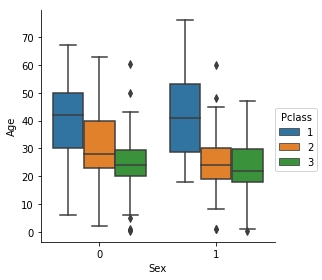

In [13]:
g = sns.factorplot(y="Age", x="Sex", hue="Pclass", data=dataset,kind="box")

## Female is represented by 1 whereas male passengers represented by 0. 
## Female age range in first and economic class is larger than the male passengers. 
## Only number of male age range in mid-class is larger than the female.

In [14]:
guess_ages = dict()

import random as rnd

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            # round to nearest age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

if combine[0]["Age"][0] != 1:
    df_train['AgeRange'] = pd.cut(df_train['Age'], 5)
    df_train[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean()
    for dataset in combine:    
        # This selection of age contributes 1% percent compared with 16.
        dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
        dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
        dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 38), 'Age'] = 2
        dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 54), 'Age'] = 3
        dataset.loc[ dataset['Age'] > 54, 'Age'] = 4

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


## We classified the age column into ranges for classification and created a new column called AgeRange. 
## Each range is represented by a number like 1-2-3...

   Age  Survived
0    0  0.329897
1    1  0.403704
2    2  0.419087
3    3  0.381944
4    4  0.309524


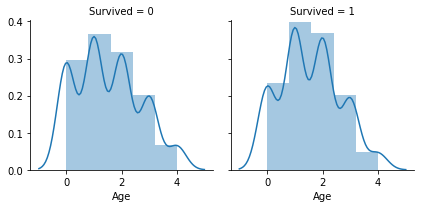

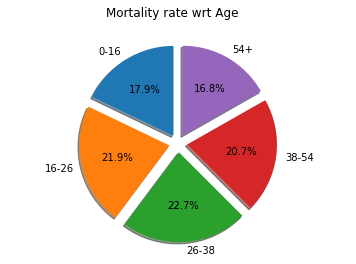

In [15]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', bins=5)

labels = '0-16', '16-26', '26-38', '38-54', '54+'

age = df_train[['Age', 'Survived']].groupby(["Age"], as_index=False).mean()
print(age)


sizes = [age["Survived"][0], age["Survived"][1],age["Survived"][2],age["Survived"][3],age["Survived"][4]]

explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Age")

plt.show()

## Lots of passengers between 16-32 passed away. 
## Passengers who are between 0-16 years old have the highest probability for surviving.
## 54+ passengers are the lowest possibility for surviving. 

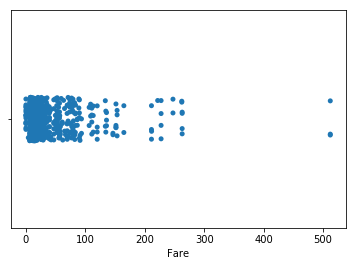

In [16]:
g = sns.stripplot(x="Fare", data=df_train, jitter=True)

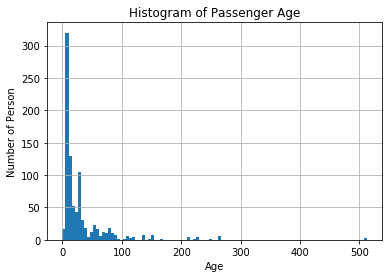

In [17]:
df_train.Fare.hist(bins=100)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

In [ ]:
df_test['Fare'].fillna(df_test['Fare'].dropna().mode()[0], inplace=True)

if combine[0]["Fare"][0] != 0:
    df_train['FareRange'] = pd.qcut(df_train['Fare'], 4)
    df_train[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)
    for dataset in combine:
        dataset.loc[ dataset['Fare'] <= 7.9, 'Fare'] = 0
        dataset.loc[(dataset['Fare'] > 7.9) & (dataset['Fare'] <= 10), 'Fare'] = 1
        dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 15), 'Fare']   = 2
        dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 30), 'Fare']   = 3        
        dataset.loc[ dataset['Fare'] > 30, 'Fare'] = 4
        dataset['Fare'] = dataset['Fare'].astype(int)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,4,C85,1,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,4,C123,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,"(32.0, 48.0]","(7.91, 14.454]"


# We choose fare range by looking at the frequency between the numbers and plot diagram

In [ ]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Fare', bins=15)

labels = '0-7.9', '7.9-10', '10-15', '15-30', '30+'

fare = df_train[['Fare', 'Survived']].groupby(["Fare"], as_index=False).mean()
print(fare)

sizes = [fare["Survived"][0], fare["Survived"][1],fare["Survived"][2],fare["Survived"][3], fare["Survived"][4]]

explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Fare")

plt.show()

## As it is shown in the graph, fare range gives an important clue to moratility rate. 
## A possibility of surviving a passenger spending low amount of fare is much lower than spending more for fare cost

In [ ]:
# Spliting title of a name and added a new column called Title. 
# Since a set contains only unique attributes, we created a set to get unique titles. 
unique_title = set()
if not "Title" in dataset:
    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
        unique_title.update(dataset['Title'])
        print(dataset['Title'])
else: 
    # This dataset['Title'] is different than above one. Do not delete it. 
    print(dataset['Title'])

In [ ]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=60) 
print(unique_title)

## Frequency of name title is shown above.

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    # Actually we know that there is not any null or blank name and title too but for our case, 
    # we might not label a title so we think it is rare title too. 
    dataset['Title'] = dataset['Title'].fillna(5)

df_train['Title'].head()

### Since female passengers are survived mostly, we wanted to separate them into Miss and Mrs.
### Similarly, in order to understand the importance of title around male passengers, we get Mr and Master because both Mr and Master's frequencies are high.

In [ ]:
title = df_train[['Title', 'Survived']].groupby(["Title"], as_index=False).mean()
sizes = [title["Survived"][0], title["Survived"][1], title["Survived"][2], title["Survived"][3], title["Survived"][4]]

title_labels = ['Mr', 'Miss', 'Mrs', 'Master', 'Rare']

explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=title_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle("Mortality rate wrt Title")

plt.show()

## Mortality rate with respect to title is shown above. 
## Miss and Mrs are survived mostly.
## For men, title is important because Master's are survived more than Mr. 

In [ ]:
unique_family_member_set = set()
# if 'FamilySize' in dataset:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"]
    unique_family_member_set.update(dataset["FamilySize"])
sns.countplot(x="FamilySize", data=df_train, hue="Survived")    

g = sns.factorplot(x="FamilySize",y="Survived", data = combine[0])
g = g.set_ylabels("Survival Probability")
print(unique_family_member_set)

## Simple Result: 3 people in a family increases your chance to survive in a wreck!

In [ ]:
sns.countplot(x="SibSp", data=df_train, hue="Survived")

## Some passengers travelled with their siblings or spouses. 
## However, common case is travelling in Titanic without a sibling or spouse.
## Interestingly, when we look at the graph above, a passenger 2 siblings/spouses seems to have a greater possibility to survive. 

In [ ]:
# We get the case with having sibSp or not. 
for dataset in combine:
    dataset.loc[dataset["SibSp"]==0, "SibSp"]=0
    dataset.loc[dataset["SibSp"]!=0, "SibSp"]=1

sns.countplot(x="SibSp", data=df_train, hue="Survived")
df_train.head()

## Having siblings or spouses do not sharply affect on surviving. 
## Most of them did not survive.

In [ ]:
sns.countplot(x="Parch", data=df_train, hue="Survived")

## Mostly passengers have travelled with their families. This one is elementary family. 
## We did not like the name of Parch -> Parent - Children. 

In [ ]:
for dataset in combine:
    dataset.loc[dataset["Parch"]==0, "Parch"]=0
    dataset.loc[dataset["Parch"]!=0, "Parch"]=1
    
sns.countplot(x="Parch", data=df_train, hue="Survived")

## When we compare it with gender and age, it is not so much matter to survive. 

## Instead of separating siblings, spouses, parents, childrens, we count all as a family. 
## A passenger has a family or a family member have greater probability to live. 

In [ ]:
if "FareRange" in df_train and "AgeRange" in df_train and "Name" in df_train and "PassengerId" in df_train \
    and "Ticket" in df_train and "Cabin" in df_train:
    df_train = df_train.drop(['FareRange'], axis=1)
    df_train = df_train.drop(['AgeRange'], axis=1)
    df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
    df_test = df_test.drop(['Name'], axis=1)
    df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
    df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
    print("Columns are dropped")
else:
    # Warning: We did not check each colums one by one.

    print("Columns are already dropped.")    

* We extract title from Name column
* From age column, get ageRange and then edit age column.
* We did not use Ticket and Cabin column because we did not find a relation with mortality rate. 
* Lastly, we were added a fareRange column and edit fare column
* Therefore, we did not need these colums so we dropped them from the actual dataset. 

In [ ]:
score_list = []
combine = [df_train, df_test]
    
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

# Logistic Regression

logreg = LogisticRegression()
# X -> Our edited train data
# Y -> Only a column which has a survived score.
logreg.fit(X=X_train, y=Y_train)

# By using X_test making prediction.
Y_pred = logreg.predict(X_test)
score = logreg.score(X_train, Y_train)
acc_log = round(score * 100, 2)
score_list.append(acc_log)
acc_log